## Collaborative filtering

Le filtrage collaboratif est une technique qui peut filtrer les éléments qu’un utilisateur pourrait aimer sur la base de réactions d’utilisateurs similaires.

Il fonctionne en recherchant un grand groupe de personnes et de trouver un petit ensemble d’utilisateurs avec des goûts similaires à un utilisateur particulier. Il examine les éléments qu’ils aiment et les combine pour créer une liste classée de suggestions.

Il existe de nombreuses façons de décider quels utilisateurs sont similaires et de combiner leurs choix pour créer une liste de recommandations. Cet article vous montrera comment faire cela avec Python.

Pour expérimenter les algorithmes de recommandation, vous aurez besoin de données contenant un ensemble d’éléments et un ensemble d’utilisateurs qui ont réagi à certains des éléments.

La réaction peut être explicite (note sur une échelle de 1 à 5, aime ou déteste) ou implicite (affichage d’un élément, l’ajout à une liste de souhaits, le temps passé sur un article).

Tout en travaillant avec de telles données, vous le verrez principalement sous la forme d’une matrice composée des réactions données par un ensemble d’utilisateurs à certains éléments d’un ensemble d’éléments. Chaque ligne contiendrait les notes données par un utilisateur, et chaque colonne contiendrait les notes reçues par un article. Une matrice comportant cinq utilisateurs et cinq éléments pourrait ressembler à ceci :

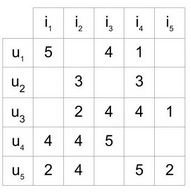

La matrice montre cinq utilisateurs qui ont évalué certains éléments sur une échelle de 1 à 5. Par exemple, le premier utilisateur a attribué une note de 4 au troisième élément.

Dans la plupart des cas, les cellules de la matrice sont vides, car les utilisateurs ne notent que quelques éléments. Il est très peu probable que chaque utilisateur note ou réagisse à chaque article disponible. Une matrice avec la plupart des cellules vides est appelée clairsemée, et le contraire de cela (une matrice principalement remplie) est appelée dense.

De nombreux ensembles de données ont été recueillis et mis à la disposition du public à des fins de recherche et d’analyse comparative. Voici une liste de sources de données de haute qualité parmi lesquelles vous pouvez choisir. 
Le meilleur pour commencer serait l’ensemble de données MovieLens recueilli par GroupLens Research. En particulier, l’ensemble de données 100k de MovieLens est un ensemble de données de référence stable avec 100000 évaluations données par 943 utilisateurs pour 1682 films, chaque utilisateur ayant obtenu au moins 20 films.

Cet ensemble de données se compose de nombreux fichiers qui contiennent des informations sur les films, les utilisateurs et les cotes attribuées par les utilisateurs aux films qu’ils ont regardés. Ceux qui sont intéressants sont les suivants:

u.item : la liste des films
u.data : la liste des notes données par les utilisateurs

Le fichier u.data qui contient les notes est une liste séparée par onglet d’ID utilisateur, d’ID article, de notation et d’horodatage. Les premières lignes du fichier ressemblent à ceci :

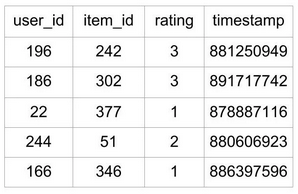

Pour construire un système qui peut recommander automatiquement des éléments aux utilisateurs en fonction des préférences des autres utilisateurs, la première étape consiste à trouver des utilisateurs ou des éléments similaires. La deuxième étape est de prévoir les notes des éléments qui ne sont pas encore notés par un utilisateur. Donc, vous aurez besoin des réponses à ces questions:

Comment déterminez-vous quels utilisateurs ou éléments sont semblables les uns aux autres?
Étant donné que vous savez quels utilisateurs sont semblables, comment déterminez-vous la cote qu’un utilisateur donnerait à un article en fonction de la cote d’utilisateurs semblables?
Comment mesurez-vous l’exactitude des cotes que vous calculez?

Les deux premières questions n’ont pas de réponse unique. Le filtrage collaboratif est une famille d’algorithmes où il existe de multiples façons de trouver des utilisateurs ou des éléments semblables et de multiples façons de calculer la cote en fonction des cotes d’utilisateurs semblables. Selon les choix que vous faites, vous vous retrouvez avec un type de filtrage collaboratif. Vous aurez l’occasion de voir les différentes approches pour trouver la similitude et de prédire les notes dans cet article.

Une chose importante à garder à l’esprit est que dans une approche basée uniquement sur le filtrage collaboratif, la similitude n’est pas calculée en utilisant des facteurs comme l’âge des utilisateurs, le genre du film, ou toute autre donnée sur les utilisateurs ou les éléments. Il est calculé uniquement sur la base de la note (explicite ou implicite) qu’un utilisateur donne à un élément. 
Par exemple, deux utilisateurs peuvent être considérés comme similaires s’ils donnent les mêmes cotes à dix films malgré qu’il y ait une grande différence dans leur âge.

La troisième question sur la façon de mesurer l’exactitude de vos prédictions comporte également de multiples réponses, qui comprennent des techniques de calcul d’erreurs qui peuvent être utilisées dans de nombreux endroits et pas seulement des recommandations basées sur le filtrage collaboratif.

L’une des approches pour mesurer l’exactitude de votre résultat est l’erreur quadratique moyenne (EMR), dans laquelle vous prédisez des côtes pour un ensemble de données de test de paires utilisateur-élément dont les valeurs de notation sont déjà connues. La différence entre la valeur connue et la valeur prévue serait l’erreur. Square toutes les valeurs d’erreur pour l’ensemble de test, trouver la moyenne (ou moyenne), puis prendre la racine carrée de cette moyenne pour obtenir la RMSE.

Une autre mesure pour mesurer l’exactitude est l’erreur absolue moyenne (MAE), dans laquelle vous trouvez l’ampleur de l’erreur en trouvant sa valeur absolue, puis en prenant la moyenne de toutes les valeurs d’erreur.

Vous n’avez pas besoin de vous soucier des détails de RMSE ou MAE à ce stade car ils sont facilement disponibles dans le cadre de différents paquets en Python, et vous les verrez plus tard dans l’article.

Examinons maintenant les différents types d’algorithmes dans la famille du filtrage collaboratif.

## Content based algorithm


Les méthodes de filtrage basées sur le contenu sont basées sur une description de l’élément et un profil des préférences de l’utilisateur. Ces méthodes conviennent mieux aux situations où il y a des données connues sur un élément (nom, emplacement, description, etc.), mais pas sur l’utilisateur. Les recommandateurs de contenu traitent la recommandation comme un problème de classification propre à l’utilisateur et apprennent à classifier les goûts et les dégoûts de l’utilisateur en fonction des caractéristiques d’un article.

Dans ce système, des mots clés sont utilisés pour décrire les éléments et un profil utilisateur est construit pour indiquer le type d’élément que cet utilisateur aime. En d’autres termes, ces algorithmes essaient de recommander des éléments qui sont similaires à ceux qu’un utilisateur a aimé dans le passé, ou examine dans le présent. 

Il ne s’appuie pas sur un mécanisme de connexion utilisateur pour générer ce profil souvent temporaire. En particulier, divers éléments candidats sont comparés avec des éléments précédemment notés par l’utilisateur et les éléments les mieux assortis sont recommandés. Cette approche trouve ses racines dans la recherche sur la récupération et le filtrage de l’information.

Pour créer un profil d’utilisateur, le système se concentre principalement sur deux types d’information :

**1. Un modèle de la préférence de l’utilisateur.**

**2. Historique de l’interaction de l’utilisateur avec le système de recommandation.**

Fondamentalement, ces méthodes utilisent un profil d’élément (c.-à-d., un ensemble d’attributs et de caractéristiques discrets) caractérisant l’élément dans le système. Pour résumer les caractéristiques des éléments du système, un algorithme de présentation des éléments est appliqué. 

Un algorithme largement utilisé est la représentation tf–idf (également appelée représentation de l’espace vectoriel). Le système crée un profil fondé sur le contenu des utilisateurs en fonction d’un vecteur pondéré de caractéristiques des articles. Les poids indiquent l’importance de chaque caractéristique pour l’utilisateur et peuvent être calculés à partir de vecteurs de contenu évalués individuellement en utilisant une variété de techniques. Les approches simples utilisent les valeurs moyennes du vecteur d’élément coté tandis que d’autres méthodes sophistiquées utilisent des techniques d’apprentissage automatique telles que les classificateurs bayésiens, l’analyse de grappes, les arbres de décision, et les réseaux neuronaux artificiels afin d’estimer la probabilité que l’utilisateur va aimer l’élément. 

Un problème clé avec le filtrage basé sur le contenu est de savoir si le système est capable d’apprendre les préférences des utilisateurs à partir des actions des utilisateurs concernant une source de contenu. Lorsque le système se limite à recommander du contenu du même type que celui que l’utilisateur utilise déjà, la valeur du système de recommandation est considérablement moindre que lorsque d’autres types de contenu provenant d’autres services peuvent être recommandés. Par exemple, recommander des articles de nouvelles en fonction de la navigation des nouvelles est utile, mais serait beaucoup plus utile lorsque la musique, les vidéos, les produits, les discussions, etc. de différents services peuvent être recommandés en fonction de la navigation des nouvelles. Pour surmonter cela, la plupart des systèmes de recommandation basés sur le contenu utilisent maintenant une certaine forme de système hybride.

Les systèmes de recommandation fondés sur le contenu peuvent également comprendre des systèmes de recommandation fondés sur l’opinion. Dans certains cas, les utilisateurs sont autorisés à laisser des commentaires ou des commentaires sur les éléments. 
Ces textes générés par les utilisateurs sont des données implicites pour le système de recommandation parce qu’ils constituent une ressource potentiellement riche en fonctionnalités/aspects de l’élément et en évaluations/sentiments des utilisateurs pour l’élément. Les fonctionnalités extraites des revues générées par les utilisateurs sont des métadonnées améliorées des éléments, car comme elles reflètent également des aspects de l’élément comme les métadonnées, les fonctionnalités extraites sont largement concernées par les utilisateurs. Les impressions extraites des commentaires peuvent être considérées comme des notes des utilisateurs sur les fonctionnalités correspondantes. Les approches populaires du système de recommandation fondé sur l’opinion utilisent diverses techniques, notamment l’exploration de textes, la recherche d’information, l’analyse des sentiments (voir aussi l’analyse multimodale des sentiments) et l’apprentissage en profondeur

## Hybrid recommandations


Les approches hybrides peuvent être mises en œuvre de plusieurs façons : en faisant des prédictions basées sur le contenu et sur la collaboration séparément, puis en les combinant; en ajoutant des capacités basées sur le contenu à une approche basée sur la collaboration (et vice versa); ou en unifiant les approches en un seul modèle (voir[22] pour un examen complet des systèmes de recommandation). Plusieurs études qui comparent empiriquement le rendement de l’hybride avec les méthodes purement collaboratives et basées sur le contenu et ont démontré que les méthodes hybrides peuvent fournir des recommandations plus précises que les approches pures. 

Ces méthodes peuvent également être utilisées pour surmonter certains des problèmes courants dans les systèmes de recommandation tels que le démarrage à froid et le problème de faible intensité, ainsi que le goulot d’étranglement de l’ingénierie de la connaissance dans les approches fondées sur la connaissance. [52]

Netflix est un bon exemple de l’utilisation de systèmes de recommandation hybrides. [53] Le site Web fait des recommandations en comparant les habitudes de visionnement et de recherche d’utilisateurs similaires (c.-à-d. filtrage collaboratif) ainsi qu’en offrant des films qui partagent des caractéristiques avec des films qu’un utilisateur a hautement cotés (filtrage basé sur le contenu).

***Certaines techniques d’hybridation comprennent :***

**Pondéré** : Combinaison numérique de la note des différentes composantes de recommandation.

**Commutation** : Choisir parmi les composantes de recommandation et appliquer la composante sélectionnée.

**Mixte** : Les recommandations de différents recommandateurs sont présentées ensemble pour donner la recommandation.

**Combinaison de fonctions** : Les fonctions dérivées de différentes sources de connaissances sont combinées et données à un seul algorithme de recommandation.

**Augmentation de fonctionnalité** : Calcul d’une fonctionnalité ou d’un ensemble de fonctionnalités, qui fait alors partie de l’entrée de la technique suivante.

**Cascade** : Les recommandeurs ont une priorité stricte, les plus faibles brisant les liens dans la notation des plus élevés.

**Méta-niveau** : Une technique de recommandation est appliquée et produit une sorte de modèle, qui est alors l’entrée utilisée par le Wayback Machine.